# [CS376] Homework 1. Linear Regression

- TA : Seokin Seo (siseo@ai.kaist.ac.kr), Youngsoo Jang (ysjang@ai.kaist.ac.kr)
- Due Date : 27th Nov, 23:59 (**Any late submissions will not be accepted.**)
- Office Hour : E3-1 2443, Tues 18:30~21:30 
- Skeleton codes for this homework are based on tutorial code for textbook written by Marc Deisenroth. 
- If you're not familar with Google colab or Jupyter notebook, contact TAs in e-mail or come TA office hour on tuesday to get our help.




## README

This notebook file is *incomplete* at the first time, so you should implement some code cells for this homework.

In addition, you should write answers for given questions.

In HW1, you should submit following file:
- `hw1.ipynb`: a **completed** version of this IPython notebook. 
  - You should **implement total 17 python code cells (which are marked as TODO)** and **write total 8 answers** for given questions. 
  - Every code cell should be working and leave outputs when you submit HW.
  - **Do NOT clear** your outputs (ex. plots, outputs, etc.).  

After finishing the homework, please submit this file to **Homework 1 section in KLMS**.



### Instructions
- First of all, you should copy the original Colab notebook into your Google drive.
  - Sign in Google.
  - Click `File` in the left top on menu and select `Save a copy in Drive..`.
- Then you can edit your copied notebook in Google Colab!
  - Fill in the `TODO` marked part to run appropriately. 
  - Each code cell will be executed when you click the play button left side of the cell (or press `Ctrl+Enter`).
- Download your copied notebook file (`.ipynb` file) to your local and rename it as `hw1.ipynb`.
- Upload the file (`hw1.ipynb`) to KLMS Homework 1 section.

**[IMPORTANT]**

Please submit the notebook file (without compressing) with the name like below:

HW1_StudentID.ipynb

ex) HW1_20191234.ipynb


### Q&A Policies
- If you think your question is important for every student, make your question about HW as a comment on the code cell block in [the original notebook](https://colab.research.google.com/drive/1Ye7fnZ3PZl2REidUhWT0aNWGDYzEPVJb), not your copy.
- If you want to ask some questions about your code, contact TAs in e-mail or come TA office hour.



---




## 0. Prerequisites

The purpose of this notebook is to practice for implementing some linear algebra (equations provided) and to explore some properties of linear regression.

You can use following packages in this HW:

In [0]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
%matplotlib inline

We consider a linear regression problem of the form
$$
y = \boldsymbol x^T\boldsymbol\theta + \epsilon\,,\quad \epsilon \sim \mathcal N(0, \sigma^2)
$$
where $\boldsymbol x\in\mathbb{R}^D$ are inputs and $y\in\mathbb{R}$ are noisy observations. The parameter vector $\boldsymbol\theta\in\mathbb{R}^D$ parametrizes the function.

We assume we have a training set $(\boldsymbol x_n, y_n)$, $n=1,\ldots, N$. We summarize the sets of training inputs in $\mathcal X = \{\boldsymbol x_1, \ldots, \boldsymbol x_N\}$ and corresponding training targets $\mathcal Y = \{y_1, \ldots, y_N\}$, respectively.

In this tutorial, we are interested in finding good parameters $\boldsymbol\theta$.

## 1. Maximum Likelihood
We will start with maximum likelihood estimation of the parameters $\boldsymbol\theta$. In maximum likelihood estimation, we find the parameters $\boldsymbol\theta^{\mathrm{ML}}$ that maximize the likelihood
$$
p(\mathcal Y | \mathcal X, \boldsymbol\theta) = \prod_{n=1}^N p(y_n | \boldsymbol x_n, \boldsymbol\theta)\,.
$$
From the lecture we know that the maximum likelihood estimator is given by
$$
\boldsymbol\theta^{\text{ML}} = (\boldsymbol X^T\boldsymbol X)^{-1}\boldsymbol X^T\boldsymbol y\in\mathbb{R}^D\,,
$$
where 
$$
\boldsymbol X = [\boldsymbol x_1, \ldots, \boldsymbol x_N]^T\in\mathbb{R}^{N\times D}\,,\quad \boldsymbol y = [y_1, \ldots, y_N]^T \in\mathbb{R}^N\,.
$$

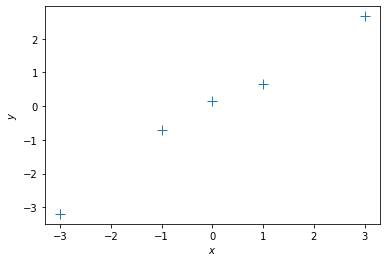

In [219]:
# Define training set
X = np.array([-3, -1, 0, 1, 3]).reshape(-1,1) # 5x1 vector, N=5, D=1
y = np.array([-3.2, -0.7, 0.14, 0.67, 2.67]).reshape(-1,1) # 5x1 vector

# Plot the training set
plt.figure()
plt.plot(X, y, '+', markersize=10)
plt.xlabel("$x$")
plt.ylabel("$y$");

Let us compute the maximum likelihood estimate for a given training set

Now, make a prediction using the maximum likelihood estimate that we just found :

In [0]:
## TODO 1: EDIT THIS FUNCTION
def max_lik_estimate(X, y):    
    # X: N x D matrix of training inputs
    # y: N x 1 vector of training targets/observations
    # returns: maximum likelihood parameters (D x 1)
    # theta_ml = (x^tx)-1x^ty
    
    N, D = X.shape
    xtxinv = np.linalg.inv(np.dot(np.transpose(X), X)) ## <-- EDIT THIS LINE    
    xty = np.dot(np.transpose(X), y)
    theta_ml = np.dot(xtxinv, xty)


    return theta_ml

In [0]:
# get maximum likelihood estimate
theta_ml = max_lik_estimate(X,y)

Now, let's see whether we got something useful:

In [0]:
## TODO 2: EDIT THIS FUNCTION
def predict_with_estimate(Xtest, theta):
    
    # Xtest: K x D matrix of test inputs
    # theta: D x 1 vector of parameters
    # returns: prediction of f(Xtest); K x 1 vector
    
    prediction = np.dot(Xtest, theta) ## <-- EDIT THIS LINE       
    
    return prediction 

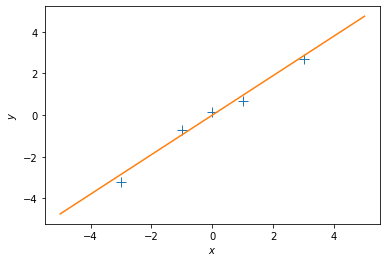

In [222]:
# define a test set
Xtest = np.linspace(-5,5,100).reshape(-1,1) # 100 x 1 vector of test inputs

# predict the function values at the test points using the maximum likelihood estimator
ml_prediction = predict_with_estimate(Xtest, theta_ml)

# plot
plt.figure()
plt.plot(X, y, '+', markersize=10)
plt.plot(Xtest, ml_prediction)
plt.xlabel("$x$")
plt.ylabel("$y$");

**Questions 1**

Q1-1. Does the solution above look reasonable?

Q1-2. Play around with different values of $\theta$. How do the corresponding functions change?

Q1-3. Modify the training targets $\mathcal Y$ and re-run your computation. What changes?

**Answers 1**

Q1-1. Yes.

Q1-2. Theta is related to the slope(gradient) of the predicted linear function. If theta decreases, the gradient of the linear function also decreases, and if theta increases, the gradient of the line also increase.

Q1-3. theta changes to a different value.


---



Let us now look at a different training set, where we add 2.0 to every $y$-value, and compute the maximum likelihood estimate

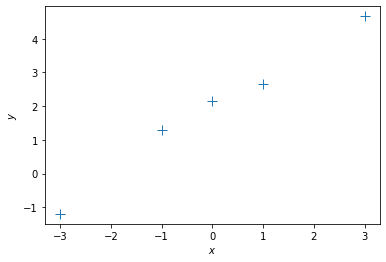

In [223]:
ynew = y + 2.0

plt.figure()
plt.plot(X, ynew, '+', markersize=10)
plt.xlabel("$x$")
plt.ylabel("$y$");

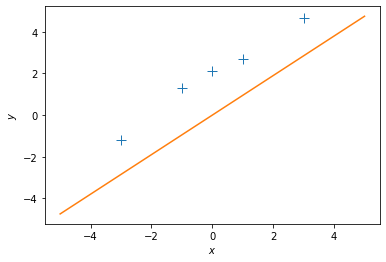

In [224]:
# get maximum likelihood estimate
theta_ml = max_lik_estimate(X, ynew)


# define a test set
Xtest = np.linspace(-5,5,100).reshape(-1,1) # 100 x 1 vector of test inputs

# predict the function values at the test points using the maximum likelihood estimator
ml_prediction = predict_with_estimate(Xtest, theta_ml)

# plot
plt.figure()
plt.plot(X, ynew, '+', markersize=10)
plt.plot(Xtest, ml_prediction)
plt.xlabel("$x$")
plt.ylabel("$y$");

**Questions 2**

Q2-1. This maximum likelihood estimate doesn't look too good: The orange line is too far away from the observations although we just shifted them by 2. Why is this the case?

Q2-2. How can we fix this problem?


**Answers 2**

Q2-1. because the prediction model doesn't have any constant(bias) part (must go through (0,0)). A linear function with a bias of 2 will best fit the model.

Q2-2. We should add some changes to the prediction model. Previous prediction model was just dot product of test inputs and theta. We should add some constant(bias) to this prediction model.


---


Let us now define a linear regression model that is slightly more flexible:
$$
y = \theta_0 + \boldsymbol x^T \boldsymbol\theta_1 + \epsilon\,,\quad \epsilon\sim\mathcal N(0,\sigma^2)
$$
Here, we added an offset (bias) parameter $\theta_0$ to our original model.

If we now define the inputs to be the augmented vector $\boldsymbol x_{\text{aug}} = \begin{bmatrix}1\\\boldsymbol x\end{bmatrix}$, we can write the new linear regression model as 
$$
y = \boldsymbol x_{\text{aug}}^T\boldsymbol\theta_{\text{aug}} + \epsilon\,,\quad \boldsymbol\theta_{\text{aug}} = \begin{bmatrix}
\theta_0\\
\boldsymbol\theta_1
\end{bmatrix}\,.
$$

In [0]:
N, D = X.shape
X_aug = np.hstack([np.ones((N,1)), X]) # augmented training inputs of size N x (D+1)
theta_aug = np.zeros((D+1, 1)) # new theta vector of size (D+1) x 1

Let us now compute the maximum likelihood estimator for this setting.
_Hint:_ If possible, re-use code that you have already written

In [0]:
## TODO 3: EDIT THIS FUNCTION
def max_lik_estimate_aug(X_aug, y):
  
    N, D = X_aug.shape
    theta_aug_ml = max_lik_estimate(X_aug, y) ## <-- EDIT THIS LINE    
    return theta_aug_ml

In [0]:
theta_aug_ml = max_lik_estimate_aug(X_aug, ynew)


Now, we can make predictions again:

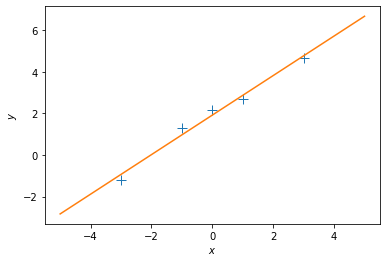

In [233]:
# define a test set (we also need to augment the test inputs with ones)
Xtest_aug = np.hstack([np.ones((Xtest.shape[0],1)), Xtest]) # 100 x (D + 1) vector of test inputs

# predict the function values at the test points using the maximum likelihood estimator
ml_prediction = predict_with_estimate(Xtest_aug, theta_aug_ml)

# plot
plt.figure()
plt.plot(X, ynew, '+', markersize=10)
plt.plot(Xtest, ml_prediction)
plt.xlabel("$x$")
plt.ylabel("$y$");

It seems this has solved our problem! 

**Questions 3**

Q3-1. Play around with the first parameter of $\boldsymbol\theta_{\text{aug}}$ and describe how the fit of the function changes.

Q3-2. Play around with the second parameter of $\boldsymbol\theta_{\text{aug}}$ and describe how the fit of the function changes.


**Answers 3**

Q3-1. the first parameter is related to the bias of the prediction function.

Q3-2. the second parameter is related to the slope(gradient) of the prediction function.


---

### Nonlinear Features : Polynomial Regression
So far, we have looked at linear regression with linear features. This allowed us to fit straight lines. However, linear regression also allows us to fit functions that are nonlinear in the inputs $\boldsymbol x$, as long as the parameters $\boldsymbol\theta$ appear linearly. This means, we can learn functions of the form
$$
f(\boldsymbol x, \boldsymbol\theta) = \sum_{k = 1}^K \theta_k \phi_k(\boldsymbol x)\,,
$$
where the features $\phi_k(\boldsymbol x)$ are (possibly nonlinear) transformations of the inputs $\boldsymbol x$.

Let us have a look at an example where the observations clearly do not lie on a straight line:

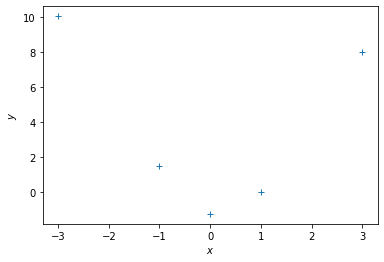

In [234]:
y = np.array([10.05, 1.5, -1.234, 0.02, 8.03]).reshape(-1,1)
plt.figure()
plt.plot(X, y, '+')
plt.xlabel("$x$")
plt.ylabel("$y$");

One class of functions that is covered by linear regression is the family of polynomials because we can write a polynomial of degree $K$ as
$$
\sum_{k=0}^K \theta_k x^k = \boldsymbol \phi(x)^T\boldsymbol\theta\,,\quad
\boldsymbol\phi(x)= 
\begin{bmatrix}
x^0\\
x^1\\
\vdots\\
x^K
\end{bmatrix}\in\mathbb{R}^{K+1}\,.
$$
Here, $\boldsymbol\phi(x)$ is a nonlinear feature transformation of the inputs $x\in\mathbb{R}$.

Similar to the earlier case we can define a matrix that collects all the feature transformations of the training inputs:
$$
\boldsymbol\Phi = \begin{bmatrix}
\boldsymbol\phi(x_1) & \boldsymbol\phi(x_2) & \cdots & \boldsymbol\phi(x_n)
\end{bmatrix}^T \in\mathbb{R}^{N\times K+1}
$$

Let us start by computing the feature matrix $\boldsymbol \Phi$

In [0]:
## TODO 4: EDIT THIS FUNCTION
def poly_features(X, K):
    
    # X: inputs of size N x 1
    # K: degree of the polynomial
    # computes the feature matrix Phi (N x (K+1))
    
    X = X.flatten()
    N = X.shape[0]

    #initialize Phi
    Phi = np.zeros((N, K+1))
    
    # Compute the feature matrix in stages
    for line_num in range(K+1):
      if line_num == 0:
        Phi[:, line_num] = X
      else:
        Phi[:, line_num] = Phi[:, line_num-1] * X 

    return Phi

With this feature matrix we get the maximum likelihood estimator as
$$
\boldsymbol \theta^\text{ML} = (\boldsymbol\Phi^T\boldsymbol\Phi)^{-1}\boldsymbol\Phi^T\boldsymbol y
$$
For reasons of numerical stability, we often add a small diagonal "jitter" $\kappa>0$ to $\boldsymbol\Phi^T\boldsymbol\Phi$ so that we can invert the matrix without significant problems so that the maximum likelihood estimate becomes
$$
\boldsymbol \theta^\text{ML} = (\boldsymbol\Phi^T\boldsymbol\Phi + \kappa\boldsymbol I)^{-1}\boldsymbol\Phi^T\boldsymbol y
$$

In [0]:
## TODO 5: EDIT THIS FUNCTION
def nonlinear_features_maximum_likelihood(Phi, y):
    # Phi: features matrix for training inputs. Size of N x D
    # y: training targets. Size of N by 1
    # returns: maximum likelihood estimator theta_ml. Size of D x 1
    
    kappa = 1e-08 # 'jitter' term; good for numerical stability
    
    D = Phi.shape[1]  
    
    # maximum likelihood estimate   
    ptpkappainv = np.linalg.inv(np.dot(np.transpose(Phi), Phi) + kappa*np.eye(D)) ## <-- EDIT THIS LINE    
    pty = np.dot(np.transpose(Phi), y) 
    theta_ml = np.dot(ptpkappainv, pty) ## <-- EDIT THIS LINE    

 
    return theta_ml

Now we have all the ingredients together: The computation of the feature matrix and the computation of the maximum likelihood estimator for polynomial regression. Let's see how this works.

To make predictions at test inputs $\boldsymbol X_{\text{test}}\in\mathbb{R}$, we need to compute the features (nonlinear transformations) $\boldsymbol\Phi_{\text{test}}= \boldsymbol\phi(\boldsymbol X_{\text{test}})$ of $\boldsymbol X_{\text{test}}$ to give us the predicted mean
$$
\mathbb{E}[\boldsymbol y_{\text{test}}] = \boldsymbol \Phi_{\text{test}}\boldsymbol\theta^{\text{ML}}
$$

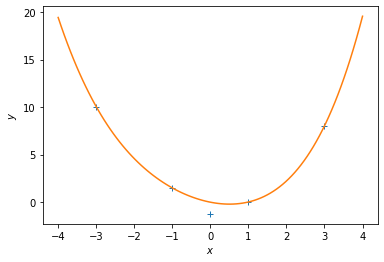

In [238]:
K = 3 # Define the degree of the polynomial we wish to fit
Phi = poly_features(X, K) # N x (K+1) feature matrix

theta_ml = nonlinear_features_maximum_likelihood(Phi, y) # maximum likelihood estimator

# test inputs
Xtest = np.linspace(-4,4,100).reshape(-1,1)

# feature matrix for test inputs
Phi_test = poly_features(Xtest, K)

y_pred = Phi_test @ theta_ml # predicted y-values

plt.figure()
plt.plot(X, y, '+')
plt.plot(Xtest, y_pred)
plt.xlabel("$x$")
plt.ylabel("$y$");

Experiment with different polynomial degrees in the code above.

**Questions 4**

Q4-1. What do you observe?

Q4-2. What is a good fit?

**Answers 4**

Q4-1. I see different prediction function graphs depending on the K(degree of polynomial)

Q4-2. A solution with k=3 seems like a good fit because it is a general function and does not overfit much.


---

### Evaluating the Quality of the Model

Let us have a look at a more interesting data set

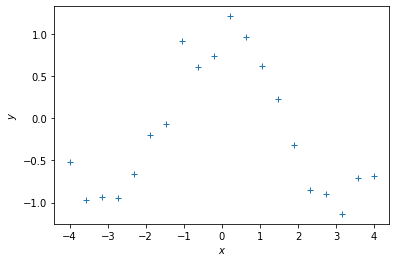

In [239]:
def f(x):   
    return np.cos(x) + 0.2 * np.random.normal(size=(x.shape))

X = np.linspace(-4,4,20).reshape(-1,1)
y = f(X)

plt.figure()
plt.plot(X, y, '+')
plt.xlabel("$x$")
plt.ylabel("$y$");

Now, let us use the work from above and fit polynomials to this dataset.

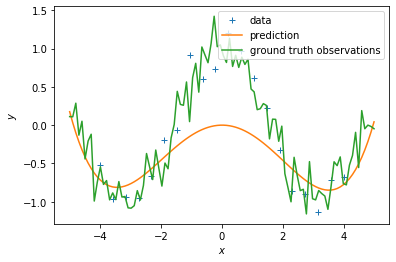

In [242]:
## TODO 6: EDIT THIS CELL
K = 3 # Define the degree of the polynomial we wish to fit

Phi = poly_features(X, K) # N x (K+1) feature matrix

theta_ml = nonlinear_features_maximum_likelihood(Phi, y) # maximum likelihood estimator

# test inputs
Xtest = np.linspace(-5,5,100).reshape(-1,1)
ytest = f(Xtest) # ground-truth y-values

# feature matrix for test inputs
Phi_test = poly_features(Xtest, K)
y_pred = Phi_test @ theta_ml # <-- EDIT THIS LINE


# plot
plt.figure()
plt.plot(X, y, '+')
plt.plot(Xtest, y_pred)
plt.plot(Xtest, ytest)
plt.legend(["data", "prediction", "ground truth observations"])
plt.xlabel("$x$")
plt.ylabel("$y$");


**Question 5**

Q5-1. Try out different degrees of polynomials. Based on visual inspection, what looks like the best fit? Why?

**Answers 5**

Q5-1. Polynomials of degree 3~5 seems to fit well. Even though higher-degree polynomials fits better to the training data than those with degree 3, those oscillate wildly and are a poor representation of the underlying function that generated the data. This will result in overfitting.

---

Let us now look at a more systematic way to assess the quality of the polynomial that we are trying to fit. For this, we compute the root-mean-squared-error (RMSE) between the $y$-values predicted by our polynomial and the ground-truth $y$-values. The RMSE is then defined as
$$
\text{RMSE} = \sqrt{\frac{1}{N}\sum_{n=1}^N(y_n - y_n^\text{pred})^2}
$$
Write a function that computes the RMSE.

In [0]:
## TODO 7: EDIT THIS FUNCTION
def RMSE(y, ypred):
    N = np.shape(y)[0]
    rmse = np.sqrt(1/N* np.sum(np.square(y - ypred))) ## <-- EDIT THIS LINE        

    return rmse

Now compute the RMSE for different degrees of the polynomial we want to fit.

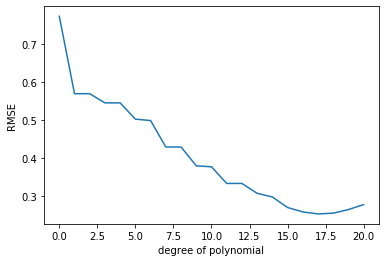

In [244]:
## TODO 8: EDIT THIS CELL
K_max = 20
rmse_train = np.zeros((K_max+1,))

for k in range(K_max+1):
    Phi = poly_features(X, k)
    theta_ml = nonlinear_features_maximum_likelihood(Phi, y)
    y_pred = Phi @ theta_ml
    rmse_train[k] = RMSE(y, y_pred) # <-- EDIT THIS LINE
    


plt.figure()
plt.plot(rmse_train)
plt.xlabel("degree of polynomial")
plt.ylabel("RMSE");

**Question 6**

Q6-1. What is the best polynomial fit according to this plot? Why?

Q6-2. Write some code that plots the function that uses the best polynomial degree (use the test set for this plot). What do you observe now?


**Answers 6**

Q6-1. The best polynomial according to this plot is k=17, with minimum RMSE value of 5.19628639e-01.

Q6-2. It seems to overfit to the training data and does not generalize well.


---

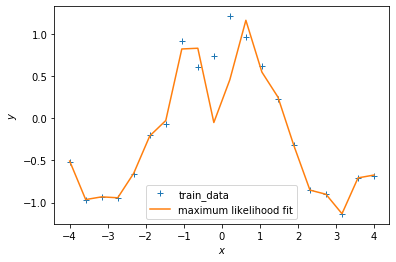

In [246]:
# TODO 9: WRITE THE PLOTTING CODE HERE
plt.figure()
plt.plot(X, y, '+')
## <--- EDIT THIS LINE (hint: you may require a few lines to do the computation)
Phi = poly_features(X, 17)
theta_ml = nonlinear_features_maximum_likelihood(Phi, y)
ypred = Phi @ theta_ml

plt.plot(X, ypred) 
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend(["train_data", "maximum likelihood fit"]);

The RMSE on the training data is somewhat misleading, because we are interested in the generalization performance of the model. Therefore, we are going to compute the RMSE on the test set and use this to choose a good polynomial degree.

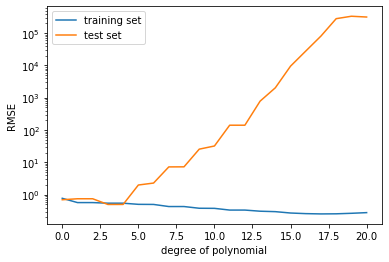

In [247]:
## TODO 10: EDIT THIS CELL
K_max = 20
rmse_train = np.zeros((K_max+1,))
rmse_test = np.zeros((K_max+1,))

for k in range(K_max+1):
    
    # feature matrix
    Phi = poly_features(X, k) ## <--- EDIT THIS LINE
    
    # maximum likelihood estimate
    theta_ml = nonlinear_features_maximum_likelihood(Phi, y) ## <--- EDIT THIS LINE
    
    # predict y-values of training set
    ypred_train = Phi @ theta_ml ## <--- EDIT THIS LINE
    
    # RMSE on training set
    rmse_train[k] = RMSE(y, ypred_train) ## <--- EDIT THIS LINE
            
    # feature matrix for test inputs
    Phi_test = poly_features(Xtest, k) ## <--- EDIT THIS LINE
    
    # prediction (test set)
    ypred_test = Phi_test @ theta_ml ## <--- EDIT THIS LINE
    
    # RMSE on test set
    rmse_test[k] = RMSE(ytest, ypred_test) ## <--- EDIT THIS LINE





plt.figure()
plt.semilogy(rmse_train) # this plots the RMSE on a logarithmic scale
plt.semilogy(rmse_test) # this plots the RMSE on a logarithmic scale
plt.xlabel("degree of polynomial")
plt.ylabel("RMSE")
plt.legend(["training set", "test set"]);

**Question 7**

Q7-1. What do you observe now?

Q7-2. Why does the RMSE for the test set not always go down?

Q7-3. Which polynomial degree would you choose now?

Q7-4. Plot the fit for the "best" polynomial degree.

Q7-5. If you did not have a designated test set, what could you do to estimate the generalization error (purely using the training set)?

**Answers 7**

Q7-1. The RMSE on the training set decreases as the order of polynomial increases, but the RMSE on the test increases after some point(after order = 3)

Q7-2. After some point, the prediction function overfits to the training data, making the RMSE of unseen data increase. This also means that high-order polynomials have bad generalization properties.

Q7-3. I would choose degree of 3.

Q7-4. Done

Q7-5. I can divide the training set into training set and test set. By leaving a portion of the training set, I can make use of this set in the same way as test sets are used.


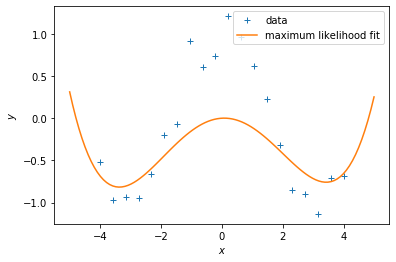

In [248]:
# TODO 11: WRITE THE PLOTTING CODE HERE
plt.figure()
plt.plot(X, y, '+')

 ## <--- EDIT THIS LINE (hint: you may require a few lines to do the computation)

Phi = poly_features(Xtest, 3)
theta_ml = nonlinear_features_maximum_likelihood(Phi, ytest)
ypred_test = Phi @ theta_ml

plt.plot(Xtest, ypred_test) 
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend(["data", "maximum likelihood fit"]);



---



## 2. Maximum A Posteriori Estimation

We are still considering the model
$$
y = \boldsymbol\phi(\boldsymbol x)^T\boldsymbol\theta + \epsilon\,,\quad \epsilon\sim\mathcal N(0,\sigma^2)\,.
$$
We assume that the noise variance $\sigma^2$ is known.

Instead of maximizing the likelihood, we can look at the maximum of the posterior distribution on the parameters $\boldsymbol\theta$, which is given as
$$
p(\boldsymbol\theta|\mathcal X, \mathcal Y) = \frac{ 
  p(\mathcal Y|\mathcal X, \boldsymbol\theta)
  p(\boldsymbol\theta)
  }{    
    p(\mathcal Y|\mathcal X)
  }
$$
The purpose of the parameter prior $p(\boldsymbol\theta)$ is to discourage the parameters to attain extreme values, a sign that the model overfits. 

The prior allows us to specify a "reasonable" range of parameter values. 

Typically, we choose a Gaussian prior $\mathcal N(\boldsymbol 0, \alpha^2\boldsymbol I)$, centered at $\boldsymbol 0$ with variance $\alpha^2$ along each parameter dimension.

The MAP estimate of the parameters is
$$
\boldsymbol\theta^{\text{MAP}} = (\boldsymbol\Phi^T\boldsymbol\Phi + \frac{\sigma^2}{\alpha^2}\boldsymbol I)^{-1}\boldsymbol\Phi^T\boldsymbol y
$$
where $\sigma^2$ is the variance of the noise.

In [0]:
## TODO 12: EDIT THIS FUNCTION
def map_estimate_poly(Phi, y, sigma, alpha):
    # Phi: training inputs, Size of N x D
    # y: training targets, Size of D x 1
    # sigma: standard deviation of the noise 
    # alpha: standard deviation of the prior on the parameters
    # returns: MAP estimate theta_map, Size of D x 1
    
    D = Phi.shape[1] 
    inverse_part = np.linalg.inv(np.transpose(Phi) @ Phi + sigma * sigma / (alpha * alpha))
    phity = np.transpose(Phi) @ y
    theta_map = inverse_part @ phity ## <-- EDIT THIS LINE    


    
    return theta_map

In [0]:
# define the function we wish to estimate later
def g(x, sigma):
    p = np.hstack([x**0, x**1, np.sin(x)])
    w = np.array([-1.0, 0.1, 1.0]).reshape(-1,1)
    return p @ w + sigma*np.random.normal(size=x.shape) 

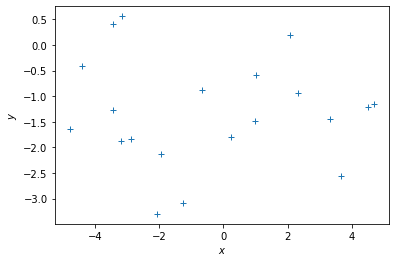

In [251]:
# Generate some data
sigma = 1.0 # noise standard deviation
alpha = 1.0 # standard deviation of the parameter prior
N = 20

np.random.seed(42)

X = (np.random.rand(N)*10.0 - 5.0).reshape(-1,1)
y = g(X, sigma) # training targets

plt.figure()
plt.plot(X, y, '+')
plt.xlabel("$x$")
plt.ylabel("$y$");

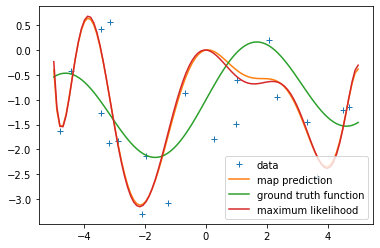

In [252]:
# get the MAP estimate
K = 8 # polynomial degree   

# feature matrix
Phi = poly_features(X, K)

theta_map = map_estimate_poly(Phi, y, sigma, alpha)

# maximum likelihood estimate
theta_ml = nonlinear_features_maximum_likelihood(Phi, y)

Xtest = np.linspace(-5,5,100).reshape(-1,1)
ytest = g(Xtest, sigma)

Phi_test = poly_features(Xtest, K)
y_pred_map = Phi_test @ theta_map
y_pred_mle = Phi_test @ theta_ml

plt.figure()
plt.plot(X, y, '+')
plt.plot(Xtest, y_pred_map)
plt.plot(Xtest, g(Xtest, 0))
plt.plot(Xtest, y_pred_mle)

plt.legend(["data", "map prediction", "ground truth function", "maximum likelihood"]);

In [253]:
print(np.hstack([theta_ml, theta_map]))

[[-4.53132343e-02  1.07154647e-01]
 [-9.68232718e-01 -9.34409260e-01]
 [ 4.06415123e-01  3.48038801e-01]
 [ 1.59658542e-01  1.51834501e-01]
 [-7.71358295e-02 -7.00605341e-02]
 [-9.18935686e-03 -8.64433936e-03]
 [ 4.42694449e-03  4.08772904e-03]
 [ 1.73396696e-04  1.61634463e-04]
 [-7.95731398e-05 -7.39562656e-05]]


Now, let us compute the RMSE on test data for different polynomial degrees and see whether the MAP estimate addresses the overfitting issue we encountered with the maximum likelihood estimate.

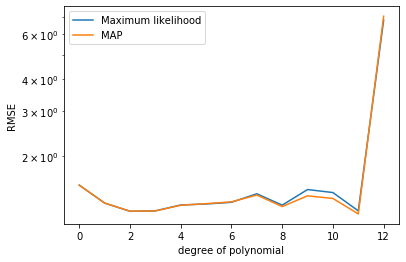

In [256]:
## TODO 13: EDIT THIS CELL

K_max = 12 # this is the maximum degree of polynomial we will consider
assert(K_max < N) # this is the latest point when we'll run into numerical problems

rmse_mle = np.zeros((K_max+1,))
rmse_map = np.zeros((K_max+1,))

for k in range(K_max+1):
    Phi = poly_features(X, k)
    theta_map = map_estimate_poly(Phi, y, sigma, alpha)
    theta_ml = nonlinear_features_maximum_likelihood(Phi, y)
    rmse_mle[k] = RMSE(poly_features(Xtest, k) @ theta_ml, ytest) ## EDIT THIS LINE : Compute the maximum likelihood estimator, compute the test-set predicitons, compute the RMSE
    rmse_map[k] = RMSE(poly_features(Xtest, k) @ theta_map, ytest) ## EDIT THIS LINE : Compute the MAP estimator, compute the test-set predicitons, compute the RMSE



plt.figure()
plt.semilogy(rmse_mle) # this plots the RMSE on a logarithmic scale
plt.semilogy(rmse_map) # this plots the RMSE on a logarithmic scale
plt.xlabel("degree of polynomial")
plt.ylabel("RMSE")
plt.legend(["Maximum likelihood", "MAP"])

**Question 8**

Q8-1. What do you observe?

Q8-2. What is the influence of the prior variance on the parameters ($\alpha^2$)? Change the parameter and describe what happens.

**Answers 8**

Q8-1. MAP and Maximum Likelihood RMSE is almost similar at lower degree of the polynomial. But for higher-orders(6 or more in this case) MAP keeps the function relatively smooth, working as a regularization effect.

Q8-2. If we increase the alpha, MAP graph becomes more close to the Maximum Likelihood graph. If we decrease alpha, MAP graph shows more regularization properties on the higer order polynomials.

## 3. Bayesian Linear Regression

In [0]:
# Test inputs
Ntest = 200
Xtest = np.linspace(-5, 5, Ntest).reshape(-1,1) # test inputs

prior_var = 0.25 # variance of the parameter prior (alpha^2). We assume this is known.
noise_var = 1.0 # noise variance (sigma^2). We assume this is known.

pol_deg = 5 # degree of the polynomial we consider at the moment

Assume a parameter prior $p(\boldsymbol\theta) = \mathcal N (\boldsymbol 0, \alpha^2\boldsymbol I)$. For every test input $\boldsymbol x_*$ we obtain the 
prior mean
$$
E[f(\boldsymbol x_*)] = 0
$$
and the prior (marginal) variance (ignoring the noise contribution)
$$
V[f(\boldsymbol x_*)] = \alpha^2\boldsymbol\phi(\boldsymbol x_*) \boldsymbol\phi(\boldsymbol x_*)^\top
$$
where $\boldsymbol\phi(\cdot)$ is the feature map.

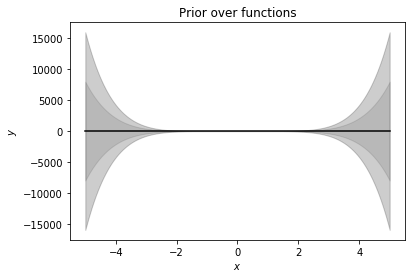

In [258]:
## TODO 14: EDIT THIS CELL

# compute the eature matrix for the test inputs
Phi_test = poly_features(Xtest, pol_deg) # N x (pol_deg+1) feature matrix <--- EDIT THIS LINE

# compute the (marginal) prior at the test input locations
# prior mean
prior_mean = np.zeros((Ntest, 1)) # prior mean at test inputs (size: (Ntest,1)) <-- EDIT THIS LINE


# prior variance
full_covariance = prior_var * (Phi_test @ np.transpose(Phi_test)) # N x N covariance matrix of all function values <-- EDIT THIS LINE
prior_marginal_var = np.diagonal(full_covariance) # marginal of size (N, )


# Let us visualize the prior over functions
plt.figure()
plt.plot(Xtest, prior_mean, color="k")

conf_bound1 = np.sqrt(prior_marginal_var).flatten()
conf_bound2 = 2.0*np.sqrt(prior_marginal_var).flatten()
conf_bound3 = 2.0*np.sqrt(prior_marginal_var + noise_var).flatten()
plt.fill_between(Xtest.flatten(), prior_mean.flatten() + conf_bound1, 
             prior_mean.flatten() - conf_bound1, alpha = 0.1, color="k")
plt.fill_between(Xtest.flatten(), prior_mean.flatten() + conf_bound2, 
                 prior_mean.flatten() - conf_bound2, alpha = 0.1, color="k")
plt.fill_between(Xtest.flatten(), prior_mean.flatten() + conf_bound3, 
                 prior_mean.flatten() - conf_bound3, alpha = 0.1, color="k")

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title("Prior over functions");

Now, we will use this prior distribution and sample functions from it.

Every sampled function is a polynomial of degree 5


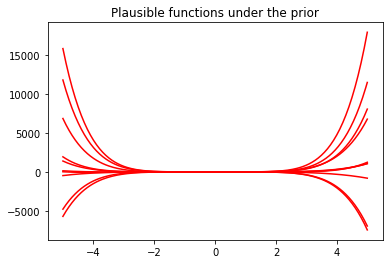

In [269]:
## TODO 15: EDIT THIS CELL

# samples from the prior
num_samples = 10

# We first need to generate random weights theta_i, which we sample from the parameter prior
random_weights = np.random.normal(size=(pol_deg+1,num_samples), scale=np.sqrt(prior_var))

# Now, we compute the induced random functions, evaluated at the test input locations
# Every function sample is given as f_i = Phi * theta_i, 
# where theta_i is a sample from the parameter prior

# sample_function = np.zeros((Ntest,)) # <-- EDIT THIS LINE
sample_function = Phi_test @ random_weights

plt.figure()
plt.plot(Xtest, sample_function, color="r")
plt.title("Plausible functions under the prior")
print("Every sampled function is a polynomial of degree "+str(pol_deg));

Now we are given some training inputs $\boldsymbol x_1, \dotsc, \boldsymbol x_N$, which we collect in a matrix $\boldsymbol X = [\boldsymbol x_1, \dotsc, \boldsymbol x_N]^\top\in\mathbb{R}^{N\times D}$

In [0]:
N = 10
X = np.random.uniform(high=5, low=-5, size=(N,1)) # training inputs, size Nx1
y = g(X, np.sqrt(noise_var)) # training targets, size Nx1

Now, let us compute the posterior 

In [0]:
## TODO 16: EDIT THIS FUNCTION
def polyfit(X, y, K, prior_var, noise_var):
    # X: training inputs, size N x D
    # y: training targets, size N x 1
    # K: degree of polynomial we consider
    # prior_var: prior variance of the parameter distribution
    # sigma: noise variance    
    jitter = 1e-08 # increases numerical stability
    N = X.shape[0]
    
    Phi = poly_features(X, K) # N x (K+1) feature matrix     


    
    # Compute maximum likelihood estimate
    theta_ml = nonlinear_features_maximum_likelihood(Phi, y) # <-- EDIT THIS LINE         
    theta_map = map_estimate_poly(Phi, y, np.sqrt(noise_var), np.sqrt(prior_var)) # <-- EDIT THIS LINE     

    # Parameter posterior
    
    S0 = 1/prior_var * np.eye(K+1)
 
    SN = np.linalg.inv(S0 + 1/noise_var * (np.transpose(Phi) @ Phi)) # covariance matrix of the parameter posterior # <-- EDIT THIS LINE     
    mN = SN @ (1/noise_var * np.transpose(Phi) @ y) # mean vector of the parameter posterior   # <-- EDIT THIS LINE     

    return (theta_ml, theta_map, mN, SN)

In [0]:
theta_ml, theta_map, theta_mean, theta_var = polyfit(X, y, pol_deg, prior_var, noise_var)

Now, let's make predictions (ignoring the measurement noise).
 
We obtain three predictors:

\begin{align}
&\text{Maximum likelihood: }E[f(\boldsymbol X_{\text{test}})] = \boldsymbol \phi(X_{\text{test}})\boldsymbol \theta_{ml}\\
&\text{Maximum a posteriori: } E[f(\boldsymbol X_{\text{test}})] = \boldsymbol \phi(X_{\text{test}})\boldsymbol \theta_{map}\\
&\text{Bayesian: } p(f(\boldsymbol X_{\text{test}})) = \mathcal N(f(\boldsymbol X_{\text{test}}) \,|\, \boldsymbol \phi(X_{\text{test}}) \boldsymbol\theta_{\text{mean}},\, \boldsymbol\phi(X_{\text{test}}) \boldsymbol\theta_{\text{var}}  \boldsymbol\phi(X_{\text{test}})^\top)
\end{align}

We already computed all quantities. Write some code that implements all three predictors.

In [0]:
##  TODO 17: EDIT THIS CELL

# predictions (ignoring the measurement/observations noise)
K = 5
Phi_test = poly_features(Xtest, K)

                    
# maximum likelihood predictions (just the mean)
m_mle_test = Phi_test @ theta_ml # <-- EDIT THIS LINE

# MAP predictions (just the mean)
m_map_test = Phi_test @ theta_map # <-- EDIT THIS LINE

# predictive distribution (Bayesian linear regression)
# mean prediction
mean_blr = Phi_test @ theta_mean # <-- EDIT THIS LINE

# variance prediction
cov_blr =  Phi_test @ theta_var @ np.transpose(Phi_test) # <-- EDIT THIS LINE



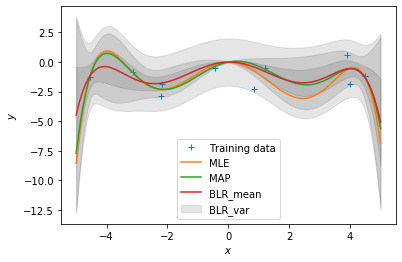

In [274]:
# plot the posterior
plt.figure()
plt.plot(X, y, "+")
plt.plot(Xtest, m_mle_test)
plt.plot(Xtest, m_map_test)

var_blr = np.diag(cov_blr)
conf_bound1 = np.sqrt(var_blr).flatten()
conf_bound2 = 2.0*np.sqrt(var_blr).flatten()
conf_bound3 = 2.0*np.sqrt(var_blr + sigma).flatten()

plt.plot(Xtest, mean_blr)
plt.fill_between(Xtest.flatten(), mean_blr.flatten() + conf_bound1, 
                 mean_blr.flatten() - conf_bound1, alpha = 0.1, color="k")
plt.fill_between(Xtest.flatten(), mean_blr.flatten() + conf_bound2, 
                 mean_blr.flatten() - conf_bound2, alpha = 0.1, color="k")
plt.fill_between(Xtest.flatten(), mean_blr.flatten() + conf_bound3, 
                 mean_blr.flatten() - conf_bound3, alpha = 0.1, color="k")
plt.legend(["Training data", "MLE", "MAP", "BLR_mean", "BLR_var"])
plt.xlabel('$x$');
plt.ylabel('$y$');

## Finish!